In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
df_housing = pd.read_csv("data/housing.csv")
df_housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [12]:
df_cars = pd.read_csv("data/models/mtcars.csv")
df_cars.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


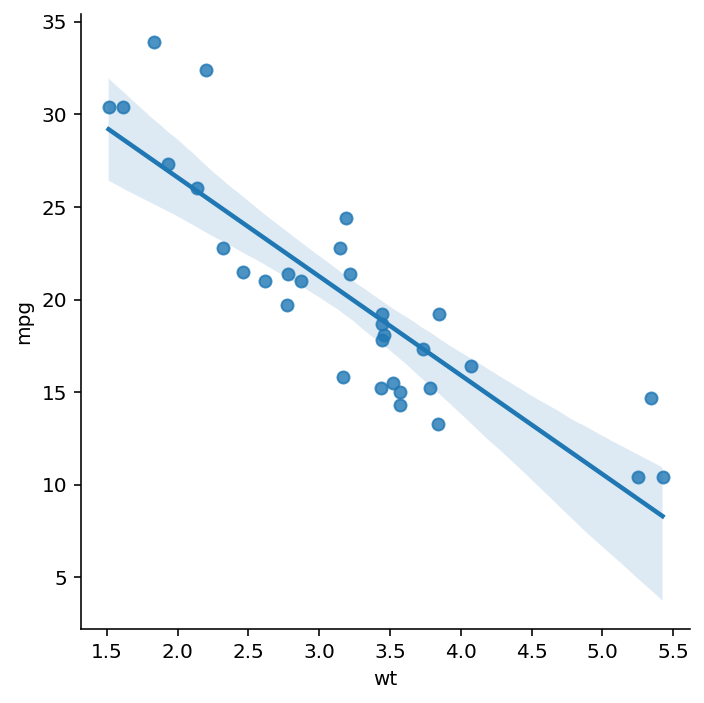

In [16]:
sns.lmplot(data = df_cars, x = "wt", y = "mpg")

<AxesSubplot:xlabel='am', ylabel='mpg'>

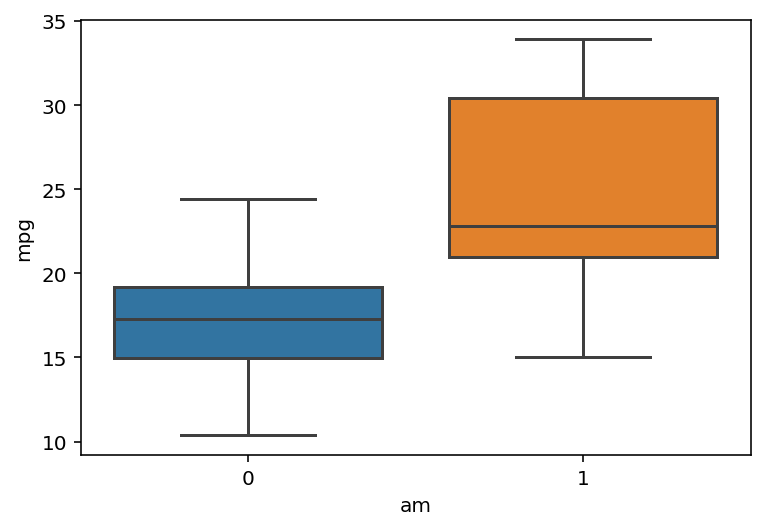

In [15]:
sns.boxplot(data = df_cars, x = "am", y = "mpg")

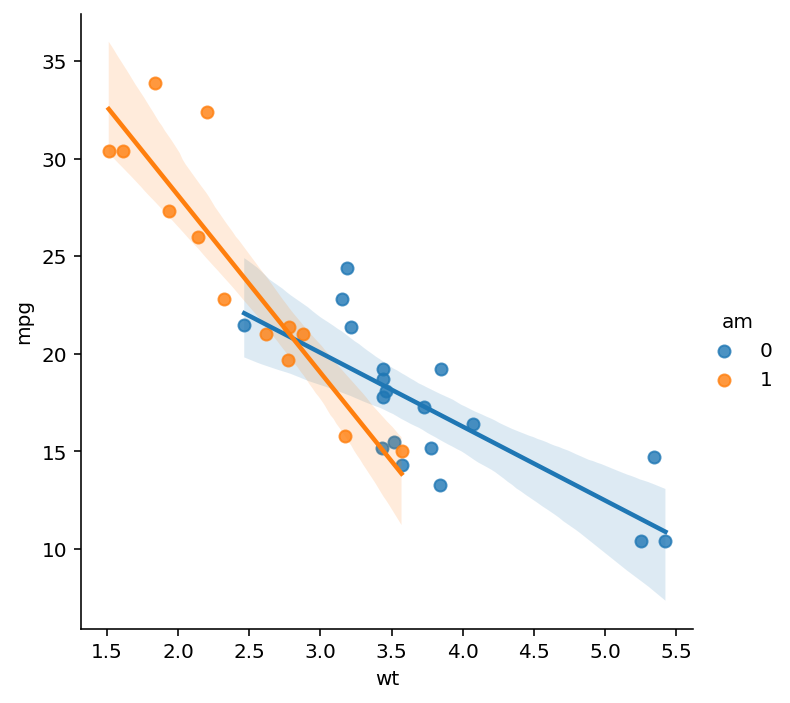

In [17]:
sns.lmplot(data = df_cars, x = "wt", y = "mpg", hue = "am")

In [18]:
mod = smf.ols(data = df_cars, formula = "mpg ~ wt * am").fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           5.21e-11
Time:                        14:25:54   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.000      25.230      37.602
wt            -3.7859      0.786     -4.819      0.000      -5.395      -2.177
am            14.8784      4.264      3.489      0.002       6.144      23.613
wt:am         -5.2984      1.445     -3.667      0.001      -8.258      -2.339
==============================================================================
Omnibus:                        3.839   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.088
Skew:                           0.761   Prob(JB):                        0.213
Kurtosis:                       2.963   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""